In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import codecs
import re

In [3]:
files = glob.glob("log*")
df = []
resnet18 = None
vgg16_1 = None
vgg16_2 = None
vgg16_3 = None
for f in files:
#     print(f)
    if f == "log1":
        lines = open(f, 'r').readlines()
        resnet18 = Extract(lines)
        df.append(resnet18)
#         df['resnet-18'] = Extract(lines)
    elif f == "log4":
        lines = open(f, 'r').readlines()
        vgg16_1 = Extract(lines)
        df.append(vgg16_1)
#         df['vgg16_unfreeze_1'] = Extract(lines)
    elif f == "log42":
        lines = open(f, 'r').readlines()
        vgg16_2 = Extract(lines)
        df.append(vgg16_2)
#         df['vgg16_unfreeze_2'] = Extract(lines)
    elif f == "log43":
        lines = open(f,'r').readlines()
        vgg16_3 = Extract(lines)
        df.append(vgg16_3)
#         df['vgg16_unfreeze_3'] = Extract(lines)
        

# 
# ls = [37.46, 40,86, 42.26, 43.14, 43.11, 43.57, 44.03, 44.84, 44.16, 44.50, 45.32, 45.37, 45.20, 45.25, 44.91]
# len(ls)
# log1 = {'Training Loss':[4.0123, 3.7902, 3.7266, 3.6752, 3.6619, 3.6348, 3.6235, 3.6100, 3.5915, 3.5838, 3.5708, 3.5648, 3.5519, 3.5501, 3.5415], 
#                'Validation Loss': [3.8177, 3.7185, 3.6732, 3.6406, 3.6228, 3.6360, 3.5966, 3.5966, 3.5963, 3.5977, 3.5826, 3.5811, 3.5991, 3.5917, 3.5820], 
#                'Training Accuracy': [32.50, 38.44, 40.36, 41.43, 41.87, 42.56, 42.72, 43.01, 43.05, 43.59, 43.85, 44.16, 44.28, 44.39, 44.71], 
#                'Validation Accuracy':[37.46, 40.86, 42.26, 43.14, 43.11, 43.57, 44.03, 44.84, 44.16, 44.50, 45.32, 45.37, 45.20, 45.25, 44.91]}
# resnet = pd.DataFrame(log1)

In [4]:
keys=['VGG16_unfreeze_3', 'VGG16_unfreeze_2','RestNet18','VGG16_unfreeze_1']

In [5]:
comb = pd.concat(df, keys = keys)


comb.loc[keys[0]]["Validation Accuracy"]

0     37.00
1     39.09
2     39.40
3     40.40
4     39.60
5     41.05
6     40.30
7     40.18
8     40.57
9     41.13
10    41.10
11    41.54
12    40.37
13    41.49
14    40.86
Name: Validation Accuracy, dtype: float64

In [2]:
def Extract(lines): 
    dict = {}
    tloss = "Training Loss:"
    tacc = "Training Accuracy:"
    trainloss = []
    validloss = []
    trainacc = []
    validacc = []
    sep = " "
    for line in lines:
        if tloss in line:
            str = line[line.find(tloss) + len(tloss):]
            str = str.split()
            trainloss.append(float(str[0]))
            validloss.append(float(str[3]))
        if tacc in line:
            str = line[line.find(tacc) + len(tacc):]
            str = str.split()
            trainacc.append(float(str[0]))
            validacc.append(float(str[3]))
    dict["Training Loss"] = trainloss
    dict["Validation Loss"] = validloss
    dict["Training Accuracy"] = trainacc
    dict["Validation Accuracy"] = validacc
    return pd.DataFrame(dict)

# sep = "|"
# x = 'uniprotkb:'
# f = open('m.txt')
# for line in f:
#   if x in line:
#     matches = [l[l.find(x)+len(x):] for l in line.split(sep) if l[l.find(x)+len(x):]]
#     print matches

Text(0, 0.5, 'Validation Accuracy(%)')

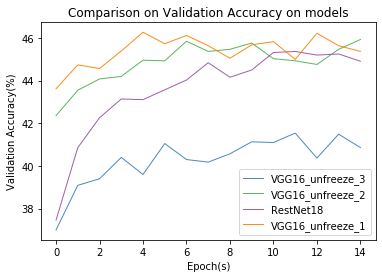

In [7]:
# style
plt.style.use('seaborn-colorblind')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num = 0
for k in keys:
    num += 1
    plt.plot(range(0,15),comb.loc[k]["Validation Accuracy"], marker='', color=palette(num), linewidth=1, alpha=0.9, label=k)

    # Add legend
    plt.legend()

 # Add titles
plt.title("Comparison on Validation Accuracy on models", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Epoch(s)")
plt.ylabel("Validation Accuracy(%)")


Text(0, 0.5, 'Training Loss')

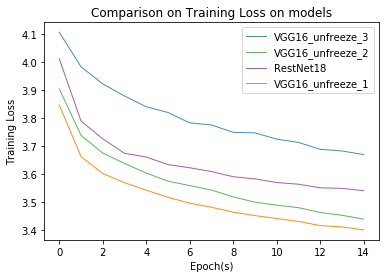

In [6]:
# style
plt.style.use('seaborn-colorblind')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num = 0
for k in keys:
    num += 1
    plt.plot(range(0,15),comb.loc[k]["Training Loss"], marker='', color=palette(num), linewidth=1, alpha=0.9, label=k)

    # Add legend
    plt.legend()

 # Add titles
plt.title("Comparison on Training Loss on models", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Epoch(s)")
plt.ylabel("Training Loss")


Text(0, 0.5, 'Training Accuracy(%)')

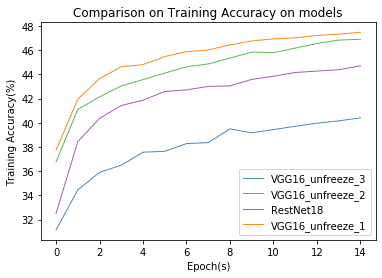

In [9]:
# style
plt.style.use('seaborn-colorblind')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num = 0
for k in keys:
    num += 1
    plt.plot(range(0,15),comb.loc[k]["Training Accuracy"], marker='', color=palette(num), linewidth=1, alpha=0.9, label=k)

    # Add legend
    plt.legend()

 # Add titles
plt.title("Comparison on Training Accuracy on models", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Epoch(s)")
plt.ylabel("Training Accuracy(%)")


[31.14, 36.77, 32.5, 37.73]
[37.0, 42.36, 37.46, 43.62]


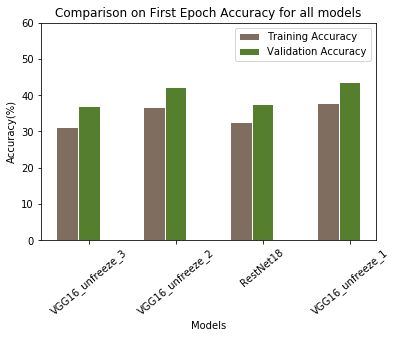

In [10]:
# set width of bar
barWidth = 0.25

bars1 = []
bars2 = []
for k in keys:
    bars1.append(comb.loc[k]["Training Accuracy"][0])
    bars2.append(comb.loc[k]["Validation Accuracy"][0])
print(bars1)
print(bars2)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training Accuracy')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Validation Accuracy')


# Add xticks on the middle of the group bars
plt.title("Comparison on First Epoch Accuracy for all models", loc='center', fontsize=12, fontweight=0, color='black')
plt.ylabel("Accuracy(%)")
plt.yticks(np.arange(0, 65, step=10))
plt.xlabel('Models')
plt.xticks([r + barWidth for r in range(len(bars1))], keys, rotation=40)

# Create legend & Show graphic
plt.legend()
plt.show()

[4.1072, 3.9051, 4.0123, 3.8476]
[3.8671, 3.6941, 3.8177, 3.6564]


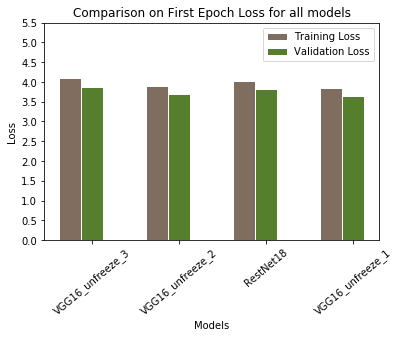

In [9]:
# set width of bar
barWidth = 0.25

bars1 = []
bars2 = []
for k in keys:
    bars1.append(comb.loc[k]["Training Loss"][0])
    bars2.append(comb.loc[k]["Validation Loss"][0])
print(bars1)
print(bars2)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training Loss')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Validation Loss')


# Add xticks on the middle of the group bars
plt.title("Comparison on First Epoch Loss for all models", loc='center', fontsize=12, fontweight=0, color='black')
plt.ylabel("Loss")
plt.yticks(np.arange(0, 6, step=0.5))
plt.xlabel('Models')
plt.xticks([r + barWidth for r in range(len(bars1))], keys, rotation=40)

# Create legend & Show graphic
plt.legend()
plt.show()

In [195]:
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })

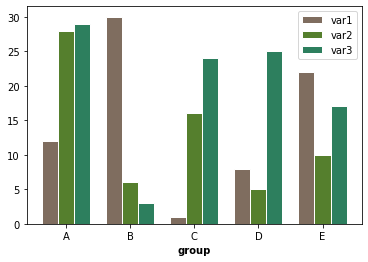

In [10]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [7]:
import pickle
import torch

# infile = open('last_model_and_history_42.pkl','rb')
# new_dict = pickle.load(infile, encoding='bytes')
new_dict = torch.load('last_model_and_history_42.pkl', map_location=lambda storage, location: 'cpu')
# infile.close()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte